In [0]:
import os
import collections
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import re
import random
import pickle
from pprint import pprint
%matplotlib inline

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve
from sklearn.metrics import hamming_loss, roc_auc_score
from sklearn.metrics import confusion_matrix 
import ssl
import copy
from keras import optimizers
from keras.losses import binary_crossentropy
from keras.metrics import binary_accuracy
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

from scipy.special import softmax

ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN, SMOTENC, SVMSMOTE
from imblearn.pipeline import make_pipeline

In [28]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['codechef_questions_v6.csv']),usecols=[3,5,6])# Dataset is now stored in a Pandas Dataframe

Saving codechef_questions_v6.csv to codechef_questions_v6 (1).csv


In [0]:
# df = pd.read_csv("codechef_questions_v6.csv",usecols=[3,5,6]) 

In [0]:
if len(str(df['Problem Statement']).split(".",1))>1:
  df['Problem Statement']=df['Problem Statement'].str.split(".",1).str[1]

In [31]:
df['prob_sol'] = df['Problem Statement'] +' '+ df['Solution']
df.head()

,Problem Statement,Solution,tags,prob_sol
0,Read problems statements in Mandarin Chinese...,\n #include <cstring>\n #include <string...,['game'],Read problems statements in Mandarin Chinese...
1,Read problems statements in Mandarin Chinese...,\n #include <cstring>\n #include <string...,['game'],Read problems statements in Mandarin Chinese...
2,Read problems statements in Mandarin Chinese...,\n #include <iostream>\n #include <vecto...,['game'],Read problems statements in Mandarin Chinese...
3,Read problems statements in Mandarin Chinese...,\n #include <bits/stdc++.h> \n using na...,['game'],Read problems statements in Mandarin Chinese...
4,Read problems statements in Mandarin Chinese...,\n /***************************************...,['game'],Read problems statements in Mandarin Chinese...


In [32]:
df.head()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['prob_sol'].apply(lambda x: [item for item in x if item not in stop])
print("done")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
done


In [0]:
def clean_statement(statement):
#     x = re.sub('-', ' ', x)
    statement = re.sub('$', ' ', statement)
    statement = re.sub('[^A-Za-z]+', ' ', statement)
    statement = re.sub('[,|.|?|\n]|\t', '', statement)
    statement = re.sub('n\'t', ' ', statement)
    statement = re.sub('submission|submissions|Submission|submission|th ', '', statement)
    statement = re.sub('one|two|given|need', '', statement)
    
    return statement

In [0]:
def clean_tags(tags):
    
    tags = clean_statement(tags).strip()
    tags = list(re.split(' ',tags))
    return tags

In [0]:
def get_unique_tags(tags):
    
    tags_list = []
    tags_set = set(tags_list)
    
    for row in tags:
        tags_set = tags_set.union(set(row))
        
    tags_list = list(tags_set)
    
    return tags_list

In [36]:
# import copy

# X = copy.deepcopy(df["prob_sol"])
X = df["prob_sol"]
Y = [clean_tags(x) for x in df["tags"]]
distinct_tags = get_unique_tags(Y)

print(distinct_tags)




['bipartite', 'multiset', 'bruteforce', 'heap', 'euler', 'array', 'pointers', 'hard', 'suffix', 'parsing', 'digraph', 'binary', 'segment', 'inversions', 'gcd', 'enumeration', 'maths', 'pattern', 'matching', 'backtracking', 'advanced', 'counting', 'implementation', 'knapsack', 'matrix', 'recursion', 'theory', 'binarysearch', 'divide', 'memoization', 'combinatorics', 'prime', 'dfs', 'interactive', 'basic', 'geometry', 'algorithm', 'fenwick', 'adhoc', 'number', 'permutation', 'map', 'hashing', 'sets', 'dynamic', 'constructive', 'game', 'bfs', 'simulation', 'fft', 'series', 'disjoint', 'recurrence', 'kruskal', 'greedy', 'tree', 'set', 'graph', 'dijkstra', 'dp', 'sieve', 'deque', 'maxflow', 'bitwise', 'fibonacci', 'sorting', 'strings', 'trees', 'algebra', 'tries', 'expo', 'search', 'bitmasking', 'probability', 'combinatorial', 'regex', 'graphs', 'stack']


In [37]:
print(len(distinct_tags))

78


In [0]:
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

In [39]:
print(mlb.classes_)

#X,Y = process_dataset(X,Y)
# plot_class_distribution(Y,mlb.classes_)

['adhoc' 'advanced' 'algebra' 'algorithm' 'array' 'backtracking' 'basic'
 'bfs' 'binary' 'binarysearch' 'bipartite' 'bitmasking' 'bitwise'
 'bruteforce' 'combinatorial' 'combinatorics' 'constructive' 'counting'
 'deque' 'dfs' 'digraph' 'dijkstra' 'disjoint' 'divide' 'dp' 'dynamic'
 'enumeration' 'euler' 'expo' 'fenwick' 'fft' 'fibonacci' 'game' 'gcd'
 'geometry' 'graph' 'graphs' 'greedy' 'hard' 'hashing' 'heap'
 'implementation' 'interactive' 'inversions' 'knapsack' 'kruskal' 'map'
 'matching' 'maths' 'matrix' 'maxflow' 'memoization' 'multiset' 'number'
 'parsing' 'pattern' 'permutation' 'pointers' 'prime' 'probability'
 'recurrence' 'recursion' 'regex' 'search' 'segment' 'series' 'set' 'sets'
 'sieve' 'simulation' 'sorting' 'stack' 'strings' 'suffix' 'theory' 'tree'
 'trees' 'tries']


In [0]:
def reduce_sample_imbalance(X_train,Y_train):
    
    global X, Y, mlb, distinct_tags
        
    xtrain_col_index = X_train.shape[1]
    xtrain_row_index = X_train.shape[0]
    
    XY = np.column_stack((X_train,Y_train))
    
    labels = [0]*len(mlb.classes_)
    row_index_to_delete = []
    ratio = []
    
    for index in range(Y_train.shape[1]):
        ratio.append(np.sum(Y_train[:,index])/Y_train.shape[0])
        if np.sum(Y_train[:,index])/Y_train.shape[0] > 0.005:
            
            labels[index] = 1
            
    ratio.sort()

    count_deletions = [0]*len(labels)
    for index in range(len(labels)):
        if labels[index] == 1:

            count_deletions[index] = int(np.sum(Y_train[:,index]) * 0.995)    
    
    for index in range(Y_train.shape[0]):
        flag_to_delete = True
        
        for yindex in range(X_train.shape[1],XY.shape[1]):
            if Y_train[index][yindex-X_train.shape[1]] == 1:
                if labels[yindex-X_train.shape[1]] == 0 or count_deletions[yindex-X_train.shape[1]] <= 0:
                    flag_to_delete = False
                    break
        
        if flag_to_delete:
            row_index_to_delete.append(index)
            for i in range(len(count_deletions)):
                count_deletions[i] -= Y_train[index][i]
    
        if sum(count_deletions) <= 0:
            break;
            
    print(XY.shape)
    XY = np.delete(XY, row_index_to_delete,axis=0)
    print(XY.shape)
    
    ratio = []
    for index in range(X_train.shape[1],XY.shape[1]):
        ratio.append(np.sum(XY[:,index])/XY.shape[0])
    
    plot_class_distribution(XY[:,X_train.shape[1]:],mlb.classes_)
    
    
    data_to_repeat_index = [1]*XY.shape[0]
    labels = [0]*len(mlb.classes_)
    ratio = []
    for index in range(xtrain_col_index,XY.shape[1]):
        ratio.append(np.sum(XY[:,index])/XY.shape[0])
        if np.sum(XY[:,index])/XY.shape[0] < 0.005:
            labels[index-xtrain_col_index] = 1
    

    ratio.sort()
        
    for index in range(XY.shape[0]):
        for yindex in range(X_train.shape[1],XY.shape[1]):
            if XY[index][yindex] == 1 and labels[yindex-X_train.shape[1]] > 0:
                data_to_repeat_index[index] = 200
                labels[yindex-X_train.shape[1]] = -1
    
    print(XY.shape)
    XY = np.repeat(XY, repeats = data_to_repeat_index, axis=0)
    print(XY.shape)
    
    X_train = XY[:,:X_train.shape[1]]
    Y_train = XY[:,X_train.shape[1]:]

    return X_train,Y_train

In [0]:
def plot_class_distribution(Y,classes):
    
    count_list = [0]*Y.shape[1]
    
    for index in range(Y.shape[1]):
        
        count_list[index] = np.sum(Y[:,index])/Y.shape[0]
    
    plt.figure(figsize=(10, 15), dpi=100)
    
    plt.barh(classes,count_list, align='center', alpha=0.5)
#     plt.bar(np.arange(Y.shape[1]),count_list, align='center', alpha=0.5)
#     plt.plot(np.arange(Y.shape[1]),count_list)
    plt.show()

In [0]:
def oversample_train_data(X_train,Y_train):
    
    global X, Y, mlb, distinct_tags
    
    X_train = pd.DataFrame(X_train).values
    
    XY = np.column_stack((X_train,Y_train))
    
    labels = []
    data_to_repeat_index = [1]*Y_train.shape[0]
    
    for index in range(Y_train.shape[1]):
        if np.sum(Y_train[:,index])/Y_train.shape[0] < 0.005:
            labels.append(index)
    
    print(labels)
    
    for index in range(Y_train.shape[0]):
        for label in labels:
            if Y_train[index][label] == 1:
                data_to_repeat_index[index] = 50
    

    XY = np.repeat(XY, repeats = data_to_repeat_index, axis=0)
    
    X_train = XY[:,0]
    Y_train = XY[:,1:]
        
#     Ytrain = mlb.inverse_transform(Y_train)
    
#     print(Ytrain)
    
    X_train = pd.Series(X_train)
    X_train = X_train.astype(str)
    Y_train = Y_train.astype('int') 
    return X_train,Y_train

(33231, 578)
(1297, 578)


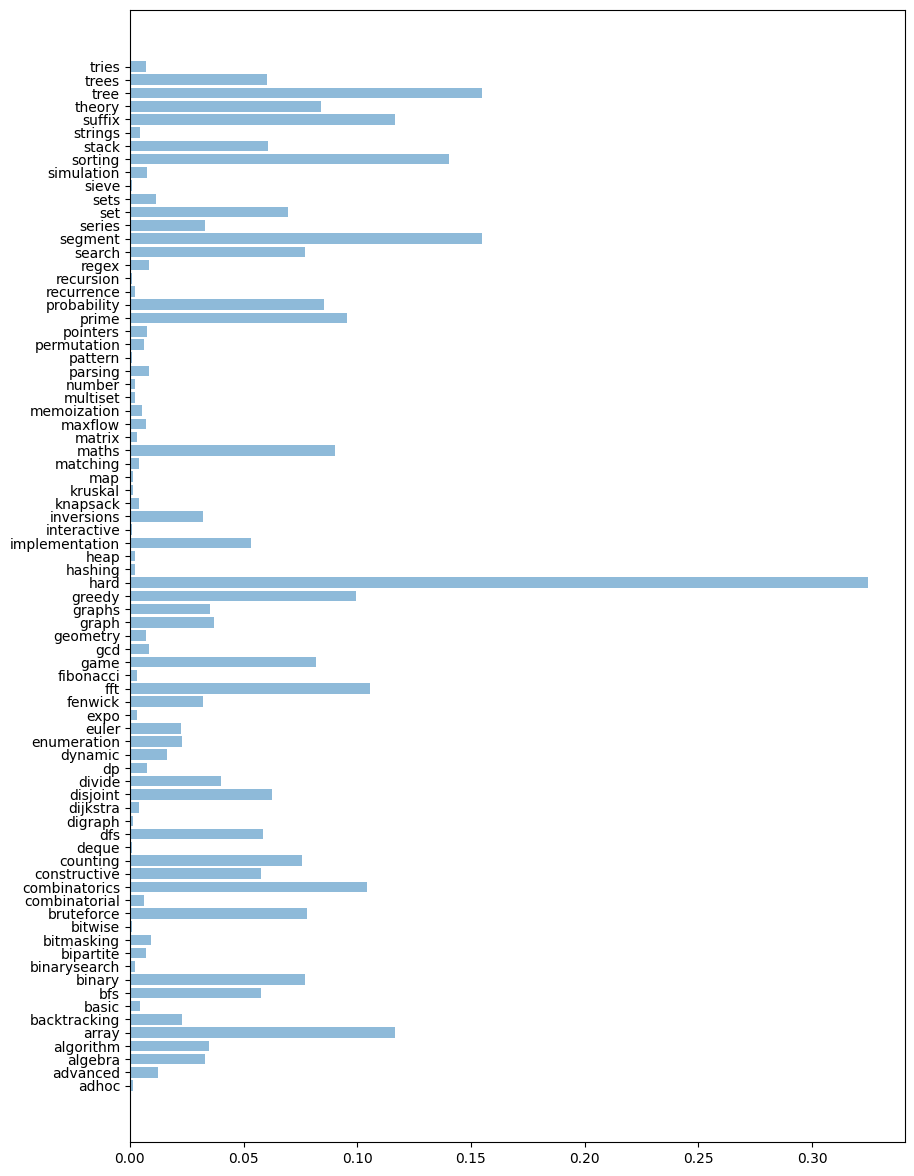

(1297, 578)
(5078, 578)
((5078, 500), (5078, 78), (8308, 500), (8308, 78))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4062 samples, validate on 1016 samples
Epoch 1/20
4062/4062 [==============================] - 91s 22ms/step - loss: 0.1418 - binary_accuracy: 0.9692 - val_loss: 0.1322 - val_binary_accuracy: 0.9771
Epoch 2/20
4062/4062 [==============================] - 87s 21ms/step - loss: 0.1311 - binary_accuracy: 0.9692 - val_loss: 0.1448 - val_binary_accuracy: 0.9771
Epoch 3/20
4062/4062 [==============================] - 87s 22ms/step - loss: 0.1231 - binary_accuracy: 0.9692 - val_loss: 0.1493 - val_binary_accuracy: 0.9771
Epoch 4/20
4062/4062 [==============================] - 88s 22ms/step - loss: 0.1083 - binary_accuracy: 0.9692 - val_loss: 0.1539 - val_binary_accuracy: 0.9771
Epoch 5/20
4062/4062 [==============================] - 88s 22ms/step - loss: 0.0917 - binary_accuracy: 0.9696 - val_loss: 0.1494 - val_binary_accuracy: 0.9771
Epoch 6/20
4062/4062 [==============================] - 88s 22ms/step - loss: 0.0821 - binary_accuracy: 0.9706 - val_loss: 0.1468 - val_binary_accuracy:

In [52]:
n_most_common_words = 2000
max_len = 500

tokenizer = Tokenizer(num_words=n_most_common_words, filters=';/@?`~', lower=False)
tokenizer.fit_on_texts(X.values)
sequences = tokenizer.texts_to_sequences(X.values)
word_index = tokenizer.word_index
_X = pad_sequences(sequences, maxlen=max_len)


X_train, X_validation, Y_train, Y_validation = train_test_split(_X, Y, test_size = 0.2, random_state = 0)

# plot_class_distribution(Y_train,mlb.classes_)
X_train,Y_train = reduce_sample_imbalance(X_train,Y_train)
# X_train,Y_train = oversample_train_data(X_train,Y_train)
# plot_class_distribution(Y_train,mlb.classes_)
# # print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
# plot_class_distribution(Y_validation,mlb.classes_)


epochs = 20
emb_dim = 300
batch_size = 250

print((X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim))
# , recurrent_dropout=0.3
model.add(LSTM(128, dropout=0.1))
model.add(Dense(78, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])
print(model.summary())

In [0]:
_y_predicted = model.predict(X_validation)

In [54]:
global X, Y, mlb, distinct_tags

# y_predicted = copy.deepcopy(_y_predicted)
# m = []
# for row in y_predicted:
#     m.append(row)

# final_prediction = []

# for row in m:
#     temp = []
#     val = np.sort(row)[-3]
#     for item in row:
#         if item < val:
#             temp.append(0)
#         else:
#             temp.append(1)
#     final_prediction.append(temp)


# final_prediction = np.array(final_prediction)

y_predicted = copy.deepcopy(_y_predicted)
predicted = [([0]*Y_validation.shape[1])]*Y_validation.shape[0]

cnt = 0
for row in y_predicted:
    count_tags = int(np.sum(Y_validation[cnt,:]))
    index_list = []

    predicted[cnt] = [0]*Y_validation.shape[1]
    
    for i in range(count_tags):
        max_val = -1
        max_index = -1
        row = list(row)
        for j in range(len(row)):
            if row[j] > max_val:

                max_index = j
                max_val = row[j]
        
        if max_val != -1 and max_index != -1:

            index_list.append(max_index)
            predicted[cnt][max_index] = 1
            row[max_index] = -10
    cnt += 1
    

final_prediction = predicted
final_prediction = np.array(final_prediction,dtype=np.int64)
Y_validation[int(Y_validation.shape[0]/2),:] =  1

        
print("Hamming_loss: ",hamming_loss(Y_validation,final_prediction))
print('Test recall_score is {}'.format(recall_score(Y_validation, final_prediction,average = 'weighted')))
print('Test precision_score is {}'.format(precision_score(Y_validation, final_prediction,average = 'weighted')))
print('Test f1_score is {}'.format(f1_score(Y_validation, final_prediction,average = 'weighted')))
print("roc_auc_score: ",roc_auc_score(Y_validation,final_prediction,average = 'weighted'))

all_labels = mlb.inverse_transform(final_prediction)
y_labels = mlb.inverse_transform(Y_validation)

# for item, labels in zip(y_labels, all_labels):
#         print('{0} => {1}'.format(item, ', '.join(labels)))
        
        
################################################################################

metrics_list = []
recall_list = []
precision_list = []
roc_auc_list = []
f1_score_list = []

classes_list = mlb.classes_
    
for col_index in range(Y_validation.shape[1]):
    recall_list.append(recall_score(Y_validation[:,col_index],final_prediction[:,col_index]))
    
for col_index in range(Y_validation.shape[1]):
    precision_list.append(precision_score(Y_validation[:,col_index],final_prediction[:,col_index]))
    
for col_index in range(Y_validation.shape[1]):
    f1_score_list.append(f1_score(Y_validation[:,col_index],final_prediction[:,col_index]))
    
for col_index in range(Y_validation.shape[1]):
    roc_auc_list.append(roc_auc_score(Y_validation[:,col_index],final_prediction[:,col_index]))

metrics_list = [mlb,classes_list,recall_list,precision_list,f1_score_list,roc_auc_list,Y_validation,final_prediction]

with open('LSTM_Codechef', 'wb') as fp:
    pickle.dump(metrics_list, fp)

################################################################################


Hamming_loss:  0.03136149278421787
Test recall_score is 0.06798245614035088
Test precision_score is 0.17028632078389108


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test f1_score is 0.04358983230596132
roc_auc_score:  0.5196914159413769


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# predictions=model.predict([X_validation])
# thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [0]:
# for val in thresholds:
#     pred=predictions.copy()
  
#     pred[pred>=val]=1
#     pred[pred<val]=0
  
#     precision = precision_score(Y_validation, pred, average='micro')
#     recall = recall_score(Y_validation, pred, average='micro')
#     f1 = f1_score(Y_validation, pred, average='micro')
   
#     print("Micro-average quality numbers")
#     print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
